In [131]:
import numpy as np
import pylab as plt

## Intractable model by Tanaka et al. 2006 for spread of tuberculosis

![](img/transmission_process.png)

### model parameter
$\alpha$: rate with which each infectious host randomly infects other individuals from an unlimited supply of hosts

$\delta$: rate with which a host stops being infectious, either by recovering or dying

$\tau$: rate with which the pathogen of the host mutates randomly within the host, generating a novel haplotype under a single-locus infinite alleles model

$\theta = (\alpha, \delta, \tau)$

$y_{\theta} = (6,3,2,2,1,1,1,1,1,1,1)$: output, vector of clusters, that is different haplotypes. Each number represents the infectious hosts for this particular haplotype

### Observation
$\alpha = 0.2, \delta = 0, \tau = 0.198, m = 20$

assume, that $\delta, \tau$ are known and apply uniform prior

In [132]:
alpha = 0.2
delta = 0
tau = 0.198
m = 20
N = 2e7

def prior():
    return np.random.uniform(0.005,2)

def simulator(alpha, delta, tau):
    m = 20
    infected_hosts = np.array([[1]]) # list of haplotypes holding infectious hosts, we always start with one infected patient
    limit_exceeded = False
    round = 0
    while np.sum(infected_hosts) <= m and not limit_exceeded:
        round += 1
        # for each haplotype
        for cell in infected_hosts:
            # for each infectious host
            if cell[0] == 0:
                continue
            for host in range(cell[0]):
                # one of three things happen: transmission, mutation or recovery/death
                event = np.random.rand()
                if event < 1/3:
                    chance = np.random.rand()
                    if chance < alpha:
                        #transmission
                        if np.sum(infected_hosts) == m:
                            limit_exceeded = True
                            break
                        else:
                            cell += 1
                elif event < 2/3:
                    chance = np.random.rand()
                    if chance < delta:
                        # recovery
                        cell -= 1
                else:
                    chance = np.random.rand()
                    if chance < tau:
                        #mutation
                        new_cell = [1]
                        cell -= 1
                        infected_hosts = np.vstack((infected_hosts, new_cell))

            if limit_exceeded:
                break
                
    return sorted(infected_hosts[infected_hosts != 0], reverse=True)

In [124]:
y0 = simulator(alpha, delta, tau)

Rounds:  41


In [134]:
thetas = []
samples = 0
for i in range(1000):
    while True:
        samples += 1
        theta = prior()
        y = simulator(theta, delta, tau)
        if y == y0:
            thetas.append(theta)
            break

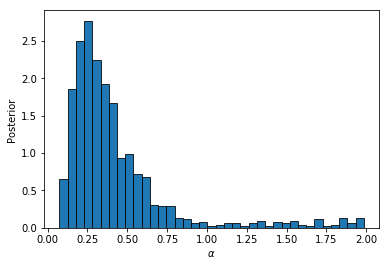

In [139]:
plt.hist(thetas, bins='auto', edgecolor='k', linewidth='0.8', normed=True)
plt.xlabel(r"$\alpha$")
plt.ylabel("Posterior")
plt.show()
